<a href="https://colab.research.google.com/github/sakshamkumar1/tensorflow-notebooks/blob/main/08_introduction_to_nlp_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP Fundamentals in TensorFlow

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-f6dec9af-c79f-c8f5-6f04-190e4d81ba16)


## Get helper functions

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-05-17 01:50:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-17 01:50:33 (103 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

unzip_data("nlp_getting_started.zip")

--2023-05-17 01:50:38--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   975KB/s    in 0.6s    

2023-05-17 01:50:39 (975 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing a text dataset

In [4]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [6]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [8]:
len(train_df), len(test_df)

(7613, 3263)

In [9]:
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
@ThomasHCrown My grandfather was set to be in the first groups of Marines to hit Japan in Operation Olympic. 95% casualty rate predictions

---

Target: 1 (real disaster)
Text:
Today marks the 70th anniversary of the bombing of Hiroshima a city I visited and was humbled by in November 2013 http://t.co/AcC1z5Q9Zw

---

Target: 0 (not real disaster)
Text:
@alanhahn @HDumpty39 Daughtery would get destroyed on twitter. His comments are emotionally driven rants with little factual basis

---

Target: 0 (not real disaster)
Text:
If it wasn't for the Blood! ????

---

Target: 1 (real disaster)
Text:
70 Years After Atomic Bombs Japan Still Struggles With War Past: The anniversary of the devastation wrought b... http://t.co/pmS4pMuR0q

---



### Split data into training and validation sets

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_df.iloc[:2].to_numpy()

array([[1, nan, nan,
        'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
        1],
       [4, nan, nan, 'Forest fire near La Ronge Sask. Canada', 1]],
      dtype=object)

In [12]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [13]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [14]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into numbers

### Text vectorization (tokenization)

In [15]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [16]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=None,
                                    pad_to_max_tokens=False)

In [17]:
len(train_sentences[0].split())

7

In [18]:
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [19]:
text_vectorizer.adapt(train_sentences)

In [20]:
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [21]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 @ItsNasB now I have to go replace my sarcasm meter which just exploded. -__-        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1,   48,    8,   24,    5,  112, 1777,   13, 4685,    1,  234,
          29,  460,    0,    0]])>

In [22]:
text_vectorizer(random_sentence)

<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([   1,   48,    8,   24,    5,  112, 1777,   13, 4685,    1,  234,
         29,  460,    0,    0])>

In [23]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Most common words in vocab: {top_5_words}")
print(f"Least common words in vocab:{bottom_5_words}")

Most common words in vocab: ['', '[UNK]', 'the', 'a', 'in']
Least common words in vocab:['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [24]:
len(words_in_vocab)

10000

### Creating an Embedding using an Embedding Layer

In [25]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)
embedding

In [26]:
random_sentence = random.choice(train_sentences)
print(f"Original test:\n{random_sentence}\
        \n\nEmbedded version:")

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original test:
RT AbbsWinston: #Zionist #Terrorist demolish 18 #Palestinian structures in Jordan Valley http://t.co/rg3BndKXjX
Û_ http://t.co/Bq90pfzMrP        

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.03337713,  0.03172071,  0.04659532, ...,  0.0495608 ,
         -0.04751468, -0.01455336],
        [ 0.04427124, -0.03070415, -0.04194995, ..., -0.00108849,
          0.04839785, -0.01100453],
        [ 0.01834689,  0.03823176, -0.00024589, ...,  0.0065727 ,
          0.00404727,  0.03069403],
        ...,
        [ 0.04127162,  0.03613882, -0.03861479, ..., -0.03805273,
          0.02434507, -0.04504966],
        [ 0.04291296, -0.01130892, -0.04112207, ...,  0.04763019,
         -0.02700012,  0.02067499],
        [-0.01609186, -0.02140539, -0.00668254, ..., -0.02259262,
          0.01269415,  0.03280154]]], dtype=float32)>

In [27]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.03337713,  0.03172071,  0.04659532,  0.04203229, -0.01691095,
        0.01996717, -0.03673755,  0.02155641,  0.01002352,  0.04373058,
       -0.03261675,  0.00486058,  0.03338614,  0.02746284, -0.02087866,
       -0.04412783,  0.02425655,  0.00231432,  0.02088315, -0.04225515,
        0.0288516 , -0.01391478, -0.0117148 ,  0.04677084, -0.04497316,
       -0.01053411,  0.00461435, -0.04146534,  0.00974695,  0.0186833 ,
       -0.03359982, -0.01378083, -0.04192549,  0.00207133,  0.02205166,
        0.03243481,  0.00469244,  0.02031714,  0.02163563, -0.00184266,
       -0.03796285,  0.02687499, -0.03366711, -0.01590444, -0.01728631,
       -0.02656608,  0.01583454, -0.04595764, -0.00287094, -0.04278031,
       -0.01257956,  0.02372478,  0.01470875,  0.01270733, -0.02573149,
       -0.0443632 ,  0.03302782,  0.03231401,  0.0240989 , -0.01390946,
       -0.00401962, -0.0066399 ,  0.04995364, -0.04944006, -0.02611793,
        0.028152

### Model 0: Getting a Baseline

In [28]:
# from sklearn.naive_bayes import GaussianNB

# gnb = GaussianNB()
# gnb.fit(train_sentences, train_labels)
# gnb.score(val_sentences, val_labels)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()),
                    ("clf", MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [30]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [31]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

## Creating an evaluation function for our model experiments

In [32]:
# Function to evaluate: accuracy, precision, recall, F1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results

In [33]:
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 1: A simple dense model (feed forward neural network)

In [34]:
from helper_functions import create_tensorboard_callback

SAVE_DIR = "model_logs"

In [35]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [36]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [37]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20230517-015044
Epoch 1/5
215/215 [==============================] - 32s 110ms/step - loss: 0.6088 - accuracy: 0.6941 - val_loss: 0.5360 - val_accuracy: 0.7507
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4401 - accuracy: 0.8196 - val_loss: 0.4763 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3468 - accuracy: 0.8594 - val_loss: 0.4598 - val_accuracy: 0.7874
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2844 - accuracy: 0.8924 - val_loss: 0.4659 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2377 - accuracy: 0.9132 - val_loss: 0.4817 - val_accuracy: 0.7874


In [38]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.7874


[0.48174723982810974, 0.787401556968689]

In [39]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.32680795],
       [0.73041147],
       [0.9977518 ],
       [0.11434381],
       [0.09352399],
       [0.9323029 ],
       [0.92118317],
       [0.9944218 ],
       [0.962712  ],
       [0.2713763 ]], dtype=float32)

In [40]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [41]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [42]:
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.74015748031496,
 'precision': 0.7937136229340627,
 'recall': 0.7874015748031497,
 'f1': 0.7839588199365206}

In [43]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [44]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Model 2: LSTM

In [45]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(f"After embedding: {x.shape}")
x = layers.LSTM(64, activation="tanh", return_sequences=True)(x)
print(f"After LSTM cell: {x.shape}")
x = layers.LSTM(64, activation="tanh")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

After embedding: (None, 15, 128)
After LSTM cell: (None, 15, 64)


In [46]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name="model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230517-015127
Epoch 1/5
215/215 [==============================] - 19s 62ms/step - loss: 0.2244 - accuracy: 0.9168 - val_loss: 0.5344 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1578 - accuracy: 0.9421 - val_loss: 0.5514 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1278 - accuracy: 0.9542 - val_loss: 0.7161 - val_accuracy: 0.7848
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1042 - accuracy: 0.9596 - val_loss: 0.8418 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0823 - accuracy: 0.9680 - val_loss: 1.0062 - val_accuracy: 0.7769


In [47]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


((762, 1),
 array([[7.3300609e-03],
        [7.1791816e-01],
        [9.9993420e-01],
        [1.7150413e-02],
        [1.2634404e-04],
        [9.9926919e-01],
        [8.9074934e-01],
        [9.9994767e-01],
        [9.9992681e-01],
        [2.5194022e-01]], dtype=float32))

In [48]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [49]:
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.69028871391076,
 'precision': 0.7784265812728361,
 'recall': 0.7769028871391076,
 'f1': 0.7750036673315875}

## Model 3: GRU

In [50]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(f"After embedding: {x.shape}")
x = layers.GRU(64, activation="tanh", return_sequences=True)(x)
print(f"After GRU cell: {x.shape}")
x = layers.GRU(64, activation="tanh")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

After embedding: (None, 15, 128)
After GRU cell: (None, 15, 64)


In [51]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3_history = model_3.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name="model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230517-015213
Epoch 1/5
215/215 [==============================] - 17s 57ms/step - loss: 0.1453 - accuracy: 0.9488 - val_loss: 0.7414 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0823 - accuracy: 0.9699 - val_loss: 0.7947 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0677 - accuracy: 0.9739 - val_loss: 0.8079 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0632 - accuracy: 0.9750 - val_loss: 1.1486 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0542 - accuracy: 0.9765 - val_loss: 0.8811 - val_accuracy: 0.7703


In [52]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10], model_3_pred_probs.shape

24/24 [==============================] - 1s 4ms/step


(array([[5.8701644e-03],
        [7.3868430e-01],
        [9.9953699e-01],
        [1.6336930e-01],
        [2.5945320e-04],
        [9.9903440e-01],
        [3.5499468e-01],
        [9.9974173e-01],
        [9.9963808e-01],
        [6.3183475e-01]], dtype=float32),
 (762, 1))

In [53]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [54]:
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.03412073490814,
 'precision': 0.7723473976820748,
 'recall': 0.7703412073490814,
 'f1': 0.7680604812955161}

## Model 4: Bidirectional RNN Model

In [55]:
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(f"After embedding: {x.shape}")
x = layers.Bidirectional(LSTM(64, activation="tanh", return_sequences=True))(x)
print(f"After Bidirectional LSTM cell: {x.shape}")
x = layers.LSTM(64, activation="tanh")(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional_LSTM")

After embedding: (None, 15, 128)
After Bidirectional LSTM cell: (None, 15, 128)
(None, 64)


In [56]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name="model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230517-015259
Epoch 1/5
215/215 [==============================] - 21s 68ms/step - loss: 0.1030 - accuracy: 0.9650 - val_loss: 1.1770 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0520 - accuracy: 0.9790 - val_loss: 1.2970 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0443 - accuracy: 0.9801 - val_loss: 1.3642 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0423 - accuracy: 0.9816 - val_loss: 1.5743 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0422 - accuracy: 0.9807 - val_loss: 1.3809 - val_accuracy: 0.7782


In [57]:
model_4.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 1.3809 - accuracy: 0.7782


[1.3808790445327759, 0.778215229511261]

In [58]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10], val_labels[:10]

24/24 [==============================] - 1s 4ms/step


(array([[2.8826224e-03],
        [9.0475589e-01],
        [9.9981314e-01],
        [2.6788937e-02],
        [1.6729966e-04],
        [9.9979287e-01],
        [9.9480224e-01],
        [9.9986219e-01],
        [9.9984491e-01],
        [7.9102218e-01]], dtype=float32),
 array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0]))

In [59]:
model_4_pred_probs.shape

(762, 1)

In [60]:
val_sentences.shape

(762,)

In [61]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [62]:
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 77.82152230971128,
 'precision': 0.7786516618308618,
 'recall': 0.7782152230971129,
 'f1': 0.7769459233664658}

## Model 5: Conv1D

In [63]:
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d_layer = layers.Conv1D(filters=32,
                              kernel_size=5,
                              activation="relu")
conv_1d_output = conv_1d_layer(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
print(f"Embedding output shape: {embedding_test.shape}")
print(f"Conv1D output shape: {conv_1d_output.shape}")
print(f"Max pool  output shape: {max_pool_output.shape}")

Embedding output shape: (1, 15, 128)
Conv1D output shape: (1, 11, 32)
Max pool  output shape: (1, 32)


In [64]:
print(f"Embedding output: {embedding_test}")
print(f"Conv1D output: {conv_1d_output}")
print(f"Max pool output: {max_pool_output}")

Embedding output: [[[ 0.00785032  0.0599041   0.06724396 ...  0.02146435 -0.05740086
   -0.005879  ]
  [-0.01780321 -0.03276668 -0.04442126 ... -0.0386773   0.00654763
    0.00416566]
  [ 0.01152076  0.04127018  0.02643637 ... -0.01137436 -0.03086713
    0.0295274 ]
  ...
  [ 0.00379851 -0.00440181 -0.00230766 ... -0.01328817 -0.0016028
    0.03514731]
  [ 0.00379851 -0.00440181 -0.00230766 ... -0.01328817 -0.0016028
    0.03514731]
  [ 0.00379851 -0.00440181 -0.00230766 ... -0.01328817 -0.0016028
    0.03514731]]]
Conv1D output: [[[0.05675219 0.         0.05366255 0.         0.03788807 0.00315197
   0.00059919 0.         0.         0.         0.         0.
   0.         0.         0.00812702 0.05377386 0.06001598 0.01651251
   0.00452105 0.         0.         0.01348084 0.         0.05238854
   0.         0.         0.04476888 0.10883978 0.         0.
   0.         0.        ]
  [0.         0.02638617 0.04270634 0.         0.12270319 0.05153698
   0.00838939 0.         0.         0.04

In [65]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_conv1d")

model_5.summary()

Model: "model_5_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 output_layer (Dense)        (None, 1)              

In [66]:
BATCH_SIZE = 32

In [67]:
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_model_5 = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              batch_size=BATCH_SIZE,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_5_conv1d")])

Saving TensorBoard log files to: model_logs/model_5_conv1d/20230517-015350
Epoch 1/5
215/215 [==============================] - 14s 53ms/step - loss: 0.1462 - accuracy: 0.9475 - val_loss: 0.8390 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0809 - accuracy: 0.9714 - val_loss: 0.9634 - val_accuracy: 0.7612
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0631 - accuracy: 0.9762 - val_loss: 1.0935 - val_accuracy: 0.7585
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0559 - accuracy: 0.9775 - val_loss: 1.1924 - val_accuracy: 0.7572
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0516 - accuracy: 0.9781 - val_loss: 1.1864 - val_accuracy: 0.7520


In [68]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:5], model_5_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(array([[8.1985676e-01],
        [9.0837592e-01],
        [9.9993730e-01],
        [5.2325994e-02],
        [3.6685577e-08]], dtype=float32),
 (762, 1))

In [69]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [70]:
model_5_results = calculate_results(y_true=val_labels,
                                  y_pred=model_5_preds)
model_5_results

{'accuracy': 75.19685039370079,
 'precision': 0.7518135850785308,
 'recall': 0.7519685039370079,
 'f1': 0.7518793495086169}

Model 6: TensorFlow Hub Pretrained Sentence Encoder

In [71]:
sample_sentence

"There's a flood in my street!"

In [72]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you can the universal sentence encoder on a sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [73]:
embed_samples[1][:50]

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([ 0.02992674, -0.07772716, -0.01693197,  0.01940701,  0.00121214,
       -0.05806179, -0.07014292,  0.01900715,  0.05421991,  0.05631085,
       -0.04905614, -0.02482397,  0.03954631,  0.08048375,  0.07105058,
       -0.06532165,  0.01291129, -0.05589467, -0.0021004 ,  0.03675132,
        0.00373514,  0.04555807,  0.05498756,  0.04859944, -0.07956812,
        0.07509261, -0.02012385, -0.01468538, -0.01609612,  0.05054295,
        0.04069994,  0.04472741, -0.04459133, -0.00769065, -0.08697077,
       -0.02373409,  0.05550095,  0.06904219, -0.00191016, -0.00593148,
        0.00569243, -0.02402766,  0.0665727 , -0.0356376 , -0.0064189 ,
       -0.00722763, -0.02007779, -0.0535391 , -0.04398567,  0.00176769],
      dtype=float32)>

In [74]:
embed_samples[0].shape

TensorShape([512])

In [75]:
embed_samples[1].shape

TensorShape([512])

In [76]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [77]:
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_6_USE")

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [78]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230517-015518
Epoch 1/5
215/215 [==============================] - 6s 15ms/step - loss: 0.5036 - accuracy: 0.7867 - val_loss: 0.4442 - val_accuracy: 0.8031
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4143 - accuracy: 0.8171 - val_loss: 0.4385 - val_accuracy: 0.8045
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4009 - accuracy: 0.8228 - val_loss: 0.4338 - val_accuracy: 0.8071
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3931 - accuracy: 0.8232 - val_loss: 0.4300 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3865 - accuracy: 0.8286 - val_loss: 0.4269 - val_accuracy: 0.8150


In [79]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.24211398],
       [0.82002205],
       [0.9888347 ],
       [0.23079993],
       [0.73498553],
       [0.76454014],
       [0.9845334 ],
       [0.98087156],
       [0.953695  ],
       [0.11650979]], dtype=float32)

In [80]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [81]:
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8154179325715127,
 'recall': 0.8149606299212598,
 'f1': 0.8141483258656864}

## Model 7: TF Hub Pretrained USE but with 10% of training data

In [82]:
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [83]:
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [84]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [85]:
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_7_USE")

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [86]:
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20230517-015542
Epoch 1/5
22/22 [==============================] - 3s 47ms/step - loss: 0.6644 - accuracy: 0.7197 - val_loss: 0.6476 - val_accuracy: 0.7152
Epoch 2/5
22/22 [==============================] - 1s 28ms/step - loss: 0.5940 - accuracy: 0.8102 - val_loss: 0.5935 - val_accuracy: 0.7585
Epoch 3/5
22/22 [==============================] - 1s 28ms/step - loss: 0.5224 - accuracy: 0.8088 - val_loss: 0.5388 - val_accuracy: 0.7769
Epoch 4/5
22/22 [==============================] - 1s 28ms/step - loss: 0.4620 - accuracy: 0.8190 - val_loss: 0.5078 - val_accuracy: 0.7756
Epoch 5/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4217 - accuracy: 0.8277 - val_loss: 0.4916 - val_accuracy: 0.7808


In [87]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.22217466],
       [0.59899604],
       [0.9083747 ],
       [0.35042307],
       [0.57162195],
       [0.7006212 ],
       [0.8800457 ],
       [0.80203795],
       [0.8665152 ],
       [0.15125787]], dtype=float32)

In [88]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [89]:
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 78.08398950131233,
 'precision': 0.781486692298758,
 'recall': 0.7808398950131233,
 'f1': 0.7794817733933848}

## Comparing the performance of each of our models

In [90]:
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1d": model_5_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "7_tf_hub_use_encoder_10_percent": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.740157,0.793714,0.787402,0.783959
2_lstm,77.690289,0.778427,0.776903,0.775004
3_gru,77.034121,0.772347,0.770341,0.768060
4_bidirectional,77.821522,0.778652,0.778215,0.776946
5_conv1d,75.196850,0.751814,0.751969,0.751879
6_tf_hub_use_encoder,81.496063,0.815418,0.814961,0.814148
7_tf_hub_use_encoder_10_percent,78.083990,0.781487,0.780840,0.779482


In [91]:
all_model_results["accuracy"] = all_model_results["accuracy"] / 100
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.787402,0.793714,0.787402,0.783959
2_lstm,0.776903,0.778427,0.776903,0.775004
3_gru,0.770341,0.772347,0.770341,0.768060
4_bidirectional,0.778215,0.778652,0.778215,0.776946
5_conv1d,0.751969,0.751814,0.751969,0.751879
6_tf_hub_use_encoder,0.814961,0.815418,0.814961,0.814148
7_tf_hub_use_encoder_10_percent,0.780840,0.781487,0.780840,0.779482


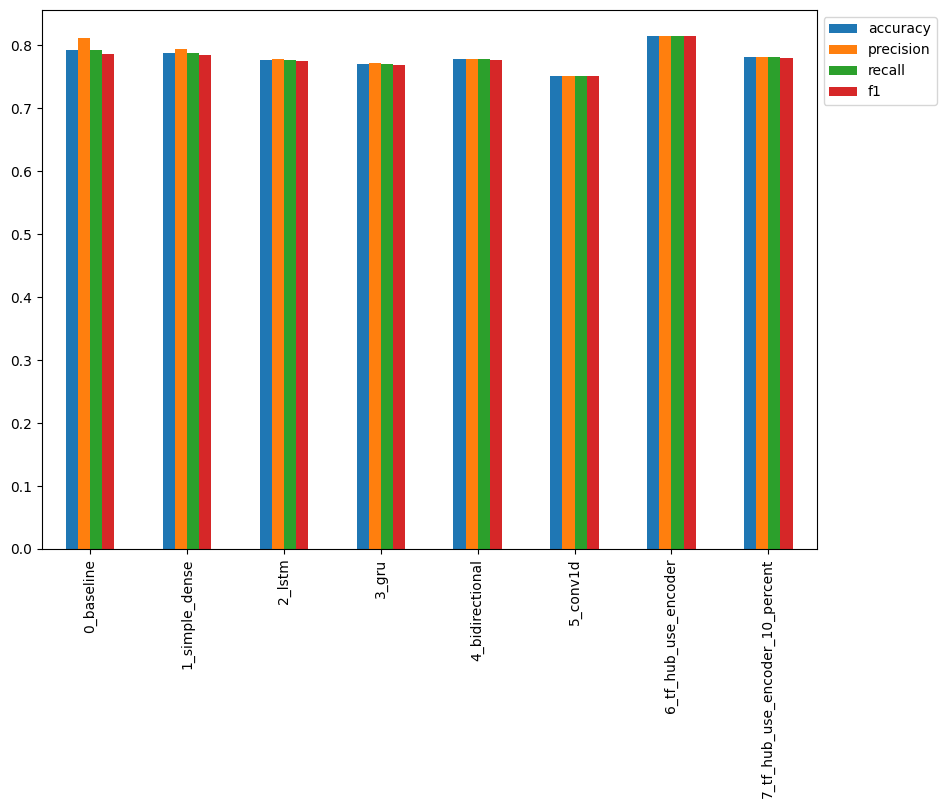

In [92]:
all_model_results.plot.bar(figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

<Axes: >

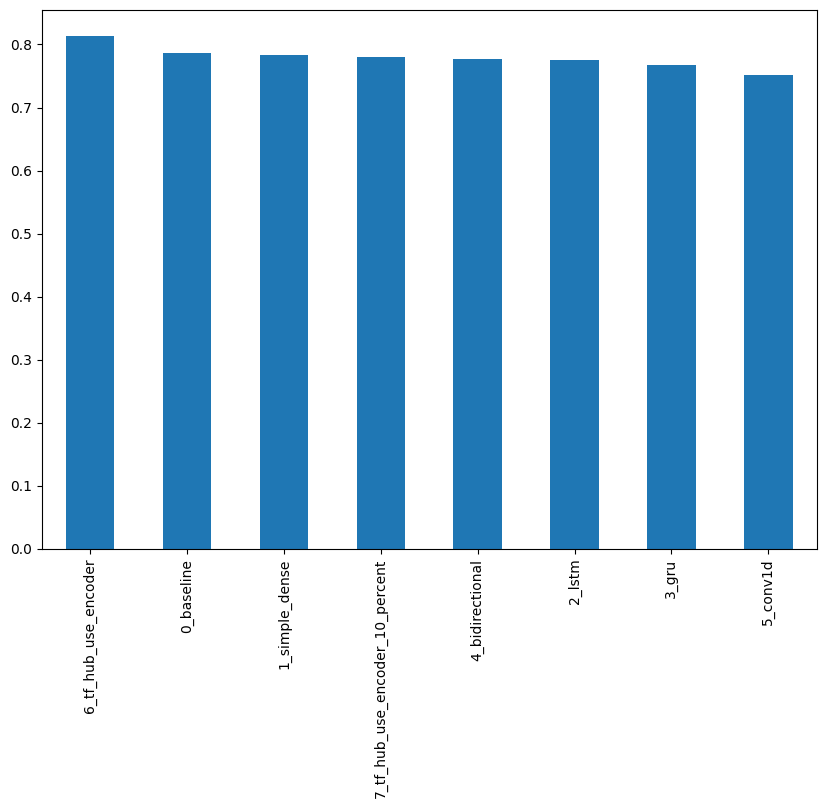

In [93]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot.bar(figsize=(10, 7))